###### Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
#to see the type of values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


### Preparing the Data

We can see that few categorical columns in the form "Yes" and "No". So we replace those with numerical values:
    - Yes as 1
    - No as 0

In [5]:
df = df.replace(['yes', 'no'], [1, 0]) 
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


For the furnishingstatus column, we cant replace those values with numbers so we make use of get_dummies library to change the values in the column into headers and get values as per their occurence in each row

In [6]:
temp = pd.get_dummies(df['furnishingstatus'],drop_first=True)

In [7]:
temp.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


We also remove the furnishingstatus column from the original dataset since we are replacing it with our updated columns

In [8]:
df.drop('furnishingstatus', axis=1, inplace=True)

In [9]:
#Adding the results to the master dataframe
df = pd.concat([df,temp],axis=1)

In [10]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


#### Creating a variable

In [11]:
#adding a variable which gives bathroom to bedroom ratio

df['bathbedratio'] = df['bathrooms']/df['bedrooms']

In [12]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,bathbedratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,0.250000


### Splitting the data into Train and Test set

In [13]:
from sklearn.cross_validation import train_test_split

X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'bathbedratio']]

y = df[['price']]

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,bathbedratio
0,7420,4,2,3,1,0,0,0,1,2,1,0,0,0.500000
1,8960,4,4,4,1,0,0,0,1,3,0,0,0,1.000000
2,9960,3,2,2,1,0,1,0,0,2,1,1,0,0.666667
3,7500,4,2,2,1,0,1,0,1,3,1,0,0,0.500000
4,7420,4,1,2,1,1,1,0,1,2,0,0,0,0.250000


In [15]:
y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

### Building the Linear Model

In [17]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)

lm = sm.OLS(y_train, X_train).fit()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [18]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     56.04
Date:                Tue, 08 Jan 2019   Prob (F-statistic):           5.59e-82
Time:                        15:23:12   Log-Likelihood:                -5813.9
No. Observations:                 381   AIC:                         1.166e+04
Df Residuals:                     366   BIC:                         1.172e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.409e+05   7.01e+05     

From the R-squared section, we notice that since its 68%, it is a good model but if we look in the coefficients section then we see that except for the area, all other coefficient fields are alot greater in value.

When we look at the values in original dataset, we see that as per the equation: y = m1x1 + m2x2 + m3x3 + ........

if any of the x value is too big then it dominates the other small values for the result

For this reason we use scaling techniques to bring them all to same level

#### Rescaling the Features
There are two ways of rescaling

- Normalisation (min-max scaling) and
- standardisation (mean-o, sigma-1) 

Here we use Normalization technique

In [19]:
def normalize(x):
    
    return ((x-np.min(x))/(max(x)-min(x)))

# applying normalize ( ) to all columns 
df = df.apply(normalize) 

#this gives value which falls in the range 1,0

In [20]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,bathbedratio
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0,0.4
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0,0.6
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.4
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.1


#### Again Splitting the data into Train and Test set

In [21]:
from sklearn.cross_validation import train_test_split

X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
     'bathbedratio']]

y = df[['price']]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [23]:
X_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished', 'bathbedratio'],
      dtype='object')

### RFE (Recursive Feature Elimination)

In [24]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [25]:
#creating an object of linearRegression

lr = LinearRegression()
rfe = RFE(lr,9)  #9 is the number of columns we want to consider
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True  True False False  True  True  True  True False
 False  True]
[1 5 1 1 1 2 4 1 1 1 1 6 3 1]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


All ```True``` values are the best features and other ones are rejected.

For ranking, all ```1```'s are the considered ones and others are rejected

In [26]:
col = X_train.columns[rfe.support_]  #reading the columns which were given as True
col

Index(['area', 'bathrooms', 'stories', 'mainroad', 'hotwaterheating',
       'airconditioning', 'parking', 'prefarea', 'bathbedratio'],
      dtype='object')

### Building the Model

In [27]:
X_train_rfe = X_train[col]

In [28]:
import statsmodels.api as sm

In [29]:
lr = sm.OLS(y_train, X_train_rfe).fit()  #running the linear model

In [30]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     408.3
Date:                Tue, 08 Jan 2019   Prob (F-statistic):          8.92e-187
Time:                        15:23:24   Log-Likelihood:                 367.46
No. Observations:                 381   AIC:                            -716.9
Df Residuals:                     372   BIC:                            -681.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
area                0.3341      0.038     

### Calculating VIF

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Var'] = X_train_rfe.columns
vif['VIF Factor'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif

,Var,VIF Factor
0,area,4.906981
1,bathrooms,2.864038
2,stories,2.189154
3,mainroad,6.178604
4,hotwaterheating,1.121189
5,airconditioning,1.737451
6,parking,2.086876
7,prefarea,1.461598
8,bathbedratio,5.727692


### Making Predictions

In [34]:
X_test_rfe = X_test[col]

# Making predictions
y_pred = lr.predict(X_test_rfe)

### Model Evaluation

In [35]:
#To see how our model is doing compared to the original results

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

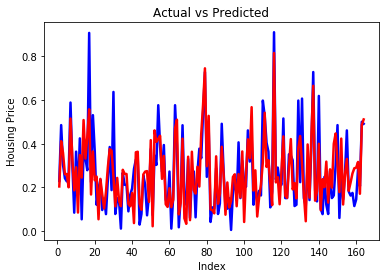

In [36]:
#Actual vs Predicted

c = [i for i in range(1,165,1)]
plt.plot(c,y_test,color = "blue", linewidth=2.5,linestyle='-')
plt.plot(c,y_pred, color = 'red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Housing Price')
plt.show()

### Error terms

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\indexes\base.py:3140: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


Text(0,0.5,'ytest-ypred')

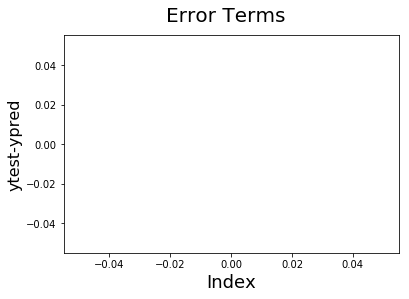

In [37]:
# Error terms
c = [i for i in range(1,165,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0,0.5,'y_pred')

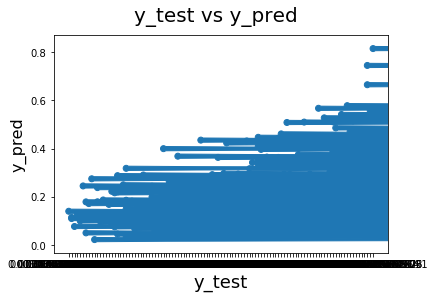

In [38]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 


### RMSE value

In [40]:
# Now let's check the Root Mean Square Error of our model.
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.10443943817703714


The rmse value is too low which indicates that our model is good